In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
df.shape

(200, 4)

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

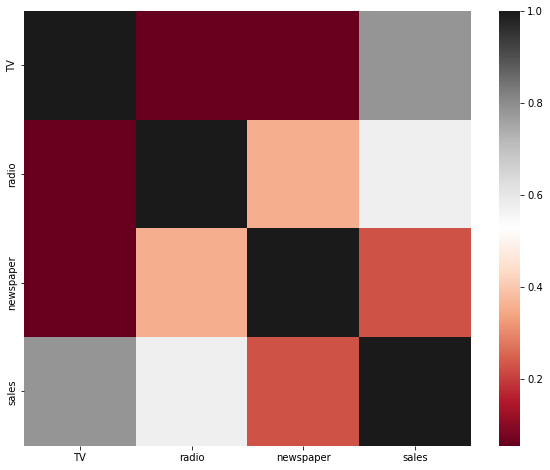

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='RdGy')

In [15]:
# Split the data into train & test
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()

In [23]:
y_test=df_test.pop('sales')
X_test=df_test

In [24]:
y_train=df_train.pop('sales')
X_train=df_train

In [25]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()

In [26]:
lr1.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=lr1.predict(X_test)

In [28]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))

1.8506819941636974


In [30]:
# evaluate the model
print(r2_score(y_test,y_pred))

0.9058622107532245


In [31]:
y_pred_train=lr1.predict(X_train)

In [32]:
# evaluate the model
print(r2_score(y_train,y_pred_train))

0.892804847190598


In [33]:
# model2 keep all
import statsmodels.api as sm

In [34]:
lr2=sm.OLS(y_train,X_train)
lr2=lr2.fit()

In [35]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2277.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                   1.21e-116
Time:                        15:34:12   Log-Likelihood:                         -301.87
No. Observations:                 140   AIC:                                      609.7
Df Residuals:                     137   BIC:                                      618.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0523      0.002     33.323      0.000       0.049       0.055
radio          0.2229      0.012     19.104      0.000       0.200       0.246
newspaper      0.0192      0.008      2.299      0.023       0.003       0.036
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.346
Skew:                          -0.294   Prob(JB):                       0.0254
Kurtosis:                       3.956   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""